# REDUCING DIMENSIONALITY USING PRINCIPAL COMPONENT ANALYSIS
_**Apply Principal Component Analysis (PCA) to reduce an appropriate dataset preserving a given explained variance**_

In [1]:
# Import required packages

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

## Retrieval & Preparation of Data

In [2]:
# Downloads MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
# Checks the shape of the dataset
print(mnist.data.shape)

(70000, 784)


In [4]:
# Splits dataset into train and test set containing 60000 and 10000 instances, respectively.

X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10000, random_state=42, stratify=mnist.target)

## Analyzing Principal Components to Reduce Dimensionality of Dataset

In [5]:
# Creates object instance to analyze principal components of data set
pca = PCA()

In [6]:
# Fits the principal component analyzer on the train set
pca.fit(X_train)

PCA()

In [83]:
# Shows variance (as ratio) explained by few of the components
# NOTE: Sum of explained variance ratio for all component will add upto 1
print(pca.explained_variance_ratio_[:10])

[0.09742223 0.07146776 0.06142348 0.05407511 0.04880344 0.04300261
 0.03283177 0.02893752 0.02750283 0.02347564]


In [7]:
# Stores sumulative sum of explained variance ratio for all the components
cumsum = np.cumsum(pca.explained_variance_ratio_)

**Choosing the Right Number of Dimensions**

_Let's choose a number of dimensions that add up to a sufficiently large portion of variance of the training dataset. Let's also consider that 95% variance of the training dataset needs to be preserved._

In [97]:
# The following statement computes the minimum number of dimension 
# required to preserve 95% variance of the training set

d = np.argmax(cumsum >= 0.95) + 1
print("Minimum number of dimensions required to preserve 95% variance:", d)

Minimum number of dimensions required to preserve 95% variance: 154


In [99]:
# Instead finding the minimum required dimension manually, as shown above, PCA can find the same for us.

# PCA is initialized with the minimum requirement of explained variance
pca = PCA(n_components=0.95)

# Applies the dimensionality reduction on the train set and it returns minimum number of 
# principal components that can explain a given variance
X_train_reduced = pca.fit_transform(X_train)

# Checks the number of principal components
print("Number of principal components: ", pca.n_components_)

Number of principal components:  154


In [13]:
# [OPTIONAL STEP] Manually adds-up variance ratio of each explained by # each of the principal 
# components and check if the sum is equal or greater than the required explained variance ratio.

print("Explained variance ratio by {0} components: {1: .4}".format(
    pca.n_components_, pca.explained_variance_ratio_.sum()))

Explained variance ratio by 154 components:  0.9504


[]

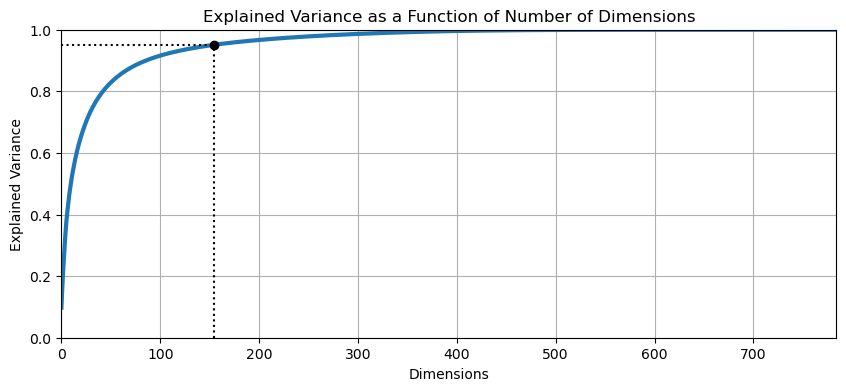

In [14]:
# Draws plot to show explained variance over dimensions

plt.figure(figsize=(10, 4))
plt.plot(cumsum, linewidth = 3)
plt.axis([0, mnist.data.shape[1], 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.title("Explained Variance as a Function of Number of Dimensions")
plt.plot()

It can be noticed from the elbow in above curve that explained variance stops growing faster after a certain number of dimensions

## Modeling Over Reduced Dimensions

**Searches for right combination of dimensions and model hyperparameters.**

For that, modeling pipeline first reduces dimension using `PCA` and then perform classification using a random forest. For hyperparameter tuning `RandomizedSearchCV` is used.

In [61]:
# Creates modeling pipeline

rf_clf = make_pipeline(
    PCA(random_state=42),                    # PCA instance that reduces dimensions
    RandomForestClassifier(random_state=42)) # model instance for making predictions

In [63]:
# Sets hyperparameter distribution
hp = {
    "pca__n_components": np.arange(20, 160),
    "randomforestclassifier__n_estimators": np.arange(100, 500)
}

In [65]:
# Searches for best combination of hyperparameters over cross validation

# Initializes randomize search algorithm
rnd_search = RandomizedSearchCV(
    rf_clf,            # model (modeling pipeline in this case)
    hp,                # Distribution of hyperparameters (all possible mentioned hyperparameters)
    n_iter=20,         # Total nuber of hyperparameter combinations to be sampled [just 20 out of 56000 ((160-20)*(500-100))]
    n_jobs=-1,         # Utilizes all available processors to speed up training
    refit=False,       # Model does not need to be refit with best parameters as test data predictions are not planned here
    cv=3,              # Less cross validation folds instead standard 5 or 10 to save time on training
    random_state=42    # For reproducability of the output
)

# Randomly samples from the given hyperparameters and checks of the current combination is better than the 
# previous one, and the process continues until the mentioned number of iterations get exhausted.
rnd_search.fit(X_train[:10000], y_train[:10000])  # NOTE: This process may take several minutes to complete

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'pca__n_components': array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64...
       412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424,
       425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437,
       438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450,
       451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463,
       464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476,
       477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489,
       490, 491, 492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42, refit=False)

In [67]:
# Gets the best hyperparameters found
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 365, 'pca__n_components': 35}


In [75]:
# Gets the best cross validation score by the random forest model with above mentioned 
# estimators and number of principal components of the data
print("Best Random Forest Model Score:", rnd_search.best_score_)

Best Random Forest Model Score: 0.9299996586341298


**Observations:**
- This prediction performance was achieved over 10000 instances and 20 iterations.
- Mentioned number of training instances and iterations (i.e. 10000 and 20, respectively) were chosen to save time during training. The training on full dataset with more iterations will take much longer during training.
- Random forest model achieved descent score using just 35 components reduced from 784 components.
- The number of reduced components will be different based on the learning algorithm being used. For example, the number of components required would be more for algorithms such as SGDClassifier that is relatively less powerful than random forest.